In [80]:
import numpy
import pandas
import matplotlib.pyplot as plt

data = {'state': ['Ohio', 'Ohio', 'Ohio', 'Nevada', 'Nevada', 'Nevada'],
        'year': [2000, 2001, 2002, 2001, 2002, 2003],
        'pop': [1.5, 1.7, 3.6, 2.4, 2.9, 3.2],
        'sales': [150, 170, 360, 240, 290, 320],
        'reps': ['bob', 'jen', None, 'jen', 'bob', None],
        'product': ['car', 'boat', 'computer', 'car', 'app', 'computer'],
        'dates': ['2000-05-02', '2001-09-15', '2002-02-25',
                  '2001-4-29', '2002-07-19', '2003-01-09']}

df_states = pandas.DataFrame(data)
df_states

,state,year,pop,sales,reps,product,dates
0,Ohio,2000,1.5,150,bob,car,2000-05-02
1,Ohio,2001,1.7,170,jen,boat,2001-09-15
2,Ohio,2002,3.6,360,None,computer,2002-02-25
3,Nevada,2001,2.4,240,jen,car,2001-4-29
4,Nevada,2002,2.9,290,bob,app,2002-07-19
5,Nevada,2003,3.2,320,None,computer,2003-01-09


In [4]:
df_states.columns

Index(['state', 'year', 'pop'], dtype='object')

In [5]:
# df_states.set_index()
df_states.index

RangeIndex(start=0, stop=6, step=1)

In [6]:
df_states.set_index('state')

,year,pop
state,,
Ohio,2000,1.5
Ohio,2001,1.7
Ohio,2002,3.6
Nevada,2001,2.4
Nevada,2002,2.9
Nevada,2003,3.2


In [7]:
df_states.reindex()

,state,year,pop
0,Ohio,2000,1.5
1,Ohio,2001,1.7
2,Ohio,2002,3.6
3,Nevada,2001,2.4
4,Nevada,2002,2.9
5,Nevada,2003,3.2


In [8]:
df_states.set_index("year")

,state,pop
year,,
2000,Ohio,1.5
2001,Ohio,1.7
2002,Ohio,3.6
2001,Nevada,2.4
2002,Nevada,2.9
2003,Nevada,3.2


In [9]:
df_states.reset_index()

,index,state,year,pop
0,0,Ohio,2000,1.5
1,1,Ohio,2001,1.7
2,2,Ohio,2002,3.6
3,3,Nevada,2001,2.4
4,4,Nevada,2002,2.9
5,5,Nevada,2003,3.2


In [10]:
df_states.reset_index(drop=True)

,state,year,pop
0,Ohio,2000,1.5
1,Ohio,2001,1.7
2,Ohio,2002,3.6
3,Nevada,2001,2.4
4,Nevada,2002,2.9
5,Nevada,2003,3.2


In [12]:
# with no index set
df_states[df_states["year"].isin([2001, 2003])]

,state,year,pop
1,Ohio,2001,1.7
3,Nevada,2001,2.4
5,Nevada,2003,3.2


In [16]:
# vs with an index set
df_states_year_idx = df_states.set_index("year")
df_states_year_idx.loc[[2001, 2003]]

,state,pop
year,,
2000,Ohio,1.5
2001,Ohio,1.7
2002,Ohio,3.6
2001,Nevada,2.4
2002,Nevada,2.9
2003,Nevada,3.2


In [21]:
# multi-level indexes
df_states_multi_idx = df_states.set_index(["year", "state"])
df_states_multi_idx

,,pop,product
year,state,,
2000,Ohio,1.5,car
2001,Ohio,1.7,boat
2002,Ohio,3.6,computer
2001,Nevada,2.4,car
2002,Nevada,2.9,app
2003,Nevada,3.2,computer


In [22]:
# subset inner levels with tuples
df_states_multi_idx.loc[[(2000, 'Ohio'), (2003, 'Nevada')]]

,,pop,product
year,state,,
2000,Ohio,1.5,car
2003,Nevada,3.2,computer


In [23]:
# sort by index
df_states_multi_idx.sort_index(level=["year", "state"],
                               ascending=[False, True])

pop   product
year state                
2003 Nevada  3.2  computer
2002 Nevada  2.9       app
     Ohio    3.6  computer
2001 Nevada  2.4       car
     Ohio    1.7      boat
2000 Ohio    1.5       car

In [24]:
df_states

,state,year,pop,product
0,Ohio,2000,1.5,car
1,Ohio,2001,1.7,boat
2,Ohio,2002,3.6,computer
3,Nevada,2001,2.4,car
4,Nevada,2002,2.9,app
5,Nevada,2003,3.2,computer


In [25]:
df_states.set_index(['product', 'state']).sort_index()

year  pop
product  state            
app      Nevada  2002  2.9
boat     Ohio    2001  1.7
car      Nevada  2001  2.4
         Ohio    2000  1.5
computer Nevada  2003  3.2
         Ohio    2002  3.6

In [28]:
df_state_idx_prod_st = df_states.set_index(['product', 'state']).sort_index()
df_state_idx_prod_st

year  pop
product  state            
app      Nevada  2002  2.9
boat     Ohio    2001  1.7
car      Nevada  2001  2.4
         Ohio    2000  1.5
computer Nevada  2003  3.2
         Ohio    2002  3.6

In [29]:
# slicing by an index
df_state_idx_prod_st.loc['boat':'car']

year  pop
product state            
boat    Ohio    2001  1.7
car     Nevada  2001  2.4
        Ohio    2000  1.5

In [30]:
# slicing inner index
df_state_idx_prod_st[('boat', 'Ohio'):('computer', 'Nevada')]

year  pop
product  state            
boat     Ohio    2001  1.7
car      Nevada  2001  2.4
         Ohio    2000  1.5
computer Nevada  2003  3.2

In [31]:
# slicing by columns
df_state_idx_prod_st.loc[:, 'year':'pop']

year  pop
product  state            
app      Nevada  2002  2.9
boat     Ohio    2001  1.7
car      Nevada  2001  2.4
         Ohio    2000  1.5
computer Nevada  2003  3.2
         Ohio    2002  3.6

In [32]:
df_state_idx_prod_st.loc[
('boat', 'Ohio'):('computer', 'Nevada'), 'year':'pop']

year  pop
product  state            
boat     Ohio    2001  1.7
car      Nevada  2001  2.4
         Ohio    2000  1.5
computer Nevada  2003  3.2

In [35]:
# time series analysis slicing
df_states_dates = df_states.set_index("dates").sort_index()
df_states_dates

,state,year,pop,product
dates,,,,
2000-05-02,Ohio,2000,1.5,car
2001-09-15,Ohio,2001,1.7,boat
2001-4-29,Nevada,2001,2.4,car
2002-02-25,Ohio,2002,3.6,computer
2002-07-19,Nevada,2002,2.9,app
2003-01-09,Nevada,2003,3.2,computer


In [36]:
df_states_dates['2001-09-01':'2002-02-28']

,state,year,pop,product
dates,,,,
2001-09-15,Ohio,2001,1.7,boat
2001-4-29,Nevada,2001,2.4,car
2002-02-25,Ohio,2002,3.6,computer


In [37]:
df_states_dates['2001':'2002']

,state,year,pop,product
dates,,,,
2001-09-15,Ohio,2001,1.7,boat
2001-4-29,Nevada,2001,2.4,car


In [38]:
df_states.iloc[2:4, 1:3]

,year,pop
2,2002,3.6
3,2001,2.4


In [39]:
df_states_dates.iloc[2:4, 1:3]

,year,pop
dates,,
2001-4-29,2001,2.4
2002-02-25,2002,3.6


In [40]:
# pivot table
df_states.pivot_table("pop", index="state", columns="product")

product,app,boat,car,computer
state,,,,
Nevada,2.9,NaN,2.4,3.2
Ohio,NaN,1.7,1.5,3.6


In [41]:
# pivot table & slice
df_states.pivot_table("pop", index="year", columns="product").loc["2002":"2003"]

product,app,boat,car,computer
year,,,,
2002,2.9,NaN,NaN,3.6
2003,NaN,NaN,NaN,3.2


In [44]:
df_states.pivot_table("pop", index="year", columns="product")

product,app,boat,car,computer
year,,,,
2000,NaN,NaN,1.5,NaN
2001,NaN,1.7,2.4,NaN
2002,2.9,NaN,NaN,3.6
2003,NaN,NaN,NaN,3.2


In [42]:
df_states_by_year_prod = df_states.pivot_table("pop", index="year", columns="product")
df_states_by_year_prod.mean(axis="index")

product
app         2.90
boat        1.70
car         1.95
computer    3.40
dtype: float64

In [43]:
df_states_by_year_prod.mean(axis="columns")

year
2000    1.50
2001    2.05
2002    3.25
2003    3.20
dtype: float64

In [48]:
df_states_by_year_prod

product,app,boat,car,computer
year,,,,
2000,NaN,NaN,1.5,NaN
2001,NaN,1.7,2.4,NaN
2002,2.9,NaN,NaN,3.6
2003,NaN,NaN,NaN,3.2


In [49]:
df_states_by_year_prod.mean()

product
app         2.90
boat        1.70
car         1.95
computer    3.40
dtype: float64

In [50]:
df_states_by_year_prod.mean().max()

3.4000000000000004

In [51]:
df_states_by_year_prod.mean().min()

1.7

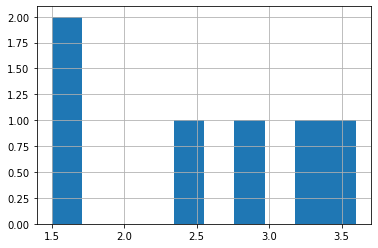

In [54]:
df_states['pop'].hist()
plt.show()

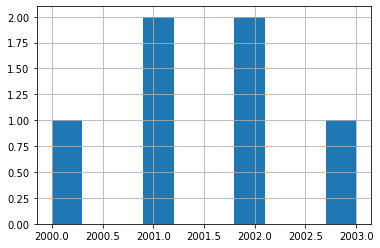

In [55]:
df_states['year'].hist()
plt.show()

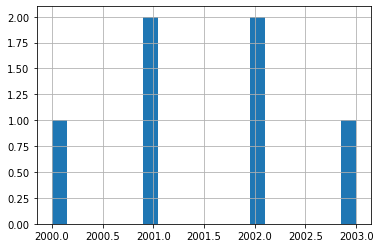

In [56]:
df_states['year'].hist(bins=20)
plt.show()

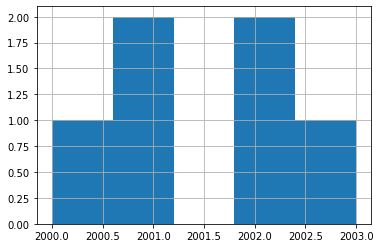

In [57]:
df_states['year'].hist(bins=5)
plt.show()

In [61]:
avg_pop_by_state = df_states.groupby('state')['pop'].mean()
avg_pop_by_state

state
Nevada    2.833333
Ohio      2.266667
Name: pop, dtype: float64

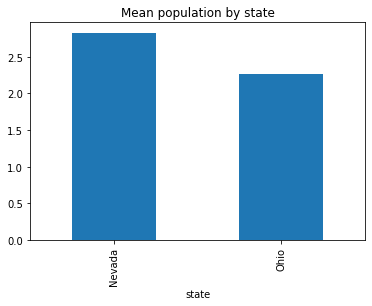

In [63]:
avg_pop_by_state.plot(kind="bar", title="Mean population by state")
plt.show()

In [70]:
df_ohio = df_states[df_states['state'] == 'Ohio'][['dates', 'pop']]
df_ohio

,dates,pop
0,2000-05-02,1.5
1,2001-09-15,1.7
2,2002-02-25,3.6


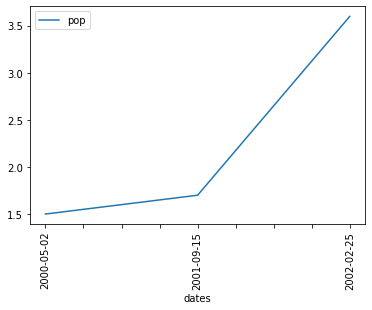

In [73]:
df_ohio.plot(kind='line', x='dates', y='pop', rot=90)
plt.show()

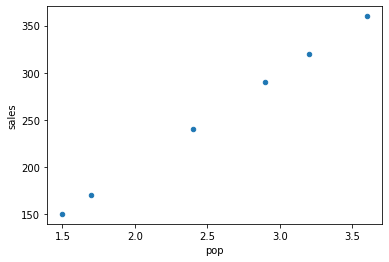

In [75]:
df_states.plot(kind='scatter', x='pop', y='sales')
plt.show()

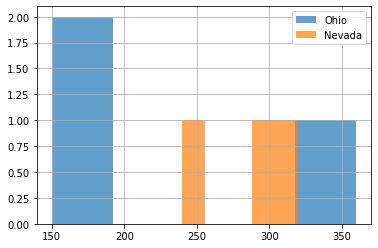

In [79]:
df_states[df_states['state'] == 'Ohio']['sales'].hist(bins=5, alpha=0.7)
df_states[df_states['state'] == 'Nevada']['sales'].hist(bins=5, alpha=0.7)
plt.legend(['Ohio', 'Nevada'])
plt.show()

In [81]:
# detect missing values
df_states.isna()

,state,year,pop,sales,reps,product,dates
0,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False
2,False,False,False,False,True,False,False
3,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False
5,False,False,False,False,True,False,False


In [82]:
df_states.isna().any()

state      False
year       False
pop        False
sales      False
reps        True
product    False
dates      False
dtype: bool

In [83]:
df_states.isna().sum()

state      0
year       0
pop        0
sales      0
reps       2
product    0
dates      0
dtype: int64

In [84]:
# drop observations that have a NaN val
df_states_obs_drop = df_states.dropna()
df_states_obs_drop

,state,year,pop,sales,reps,product,dates
0,Ohio,2000,1.5,150,bob,car,2000-05-02
1,Ohio,2001,1.7,170,jen,boat,2001-09-15
3,Nevada,2001,2.4,240,jen,car,2001-4-29
4,Nevada,2002,2.9,290,bob,app,2002-07-19


In [85]:
# fill NaN vals with a sentinel
df_states_obs_fill = df_states.fillna(0)
df_states_obs_fill

,state,year,pop,sales,reps,product,dates
0,Ohio,2000,1.5,150,bob,car,2000-05-02
1,Ohio,2001,1.7,170,jen,boat,2001-09-15
2,Ohio,2002,3.6,360,0,computer,2002-02-25
3,Nevada,2001,2.4,240,jen,car,2001-4-29
4,Nevada,2002,2.9,290,bob,app,2002-07-19
5,Nevada,2003,3.2,320,0,computer,2003-01-09


In [86]:
# constructing DataFrames
# 1 - list of dictionaries
list_of_dicts = [
    {'name':'ginger','breed':'dach','height':22,'weight':10,'dob':'2019-03-14'},
    {'name':'scout','breed':'dalm','height':59,'weight':25,'dob':'2019-05-09'}
]
df_lod = pandas.DataFrame(list_of_dicts)
df_lod

,name,breed,height,weight,dob
0,ginger,dach,22,10,2019-03-14
1,scout,dalm,59,25,2019-05-09


In [87]:
# 2 - dictionary of lists
dict_of_lists = {
    'name': ['ginger2','scout2'],
    'breed': ['dach', 'dalm'],
    'height': [23,61],
    'weight': [12,22],
    'dob': ['2019-02-01','2019-09-09']
}
df_dol = pandas.DataFrame(dict_of_lists)
df_dol

,name,breed,height,weight,dob
0,ginger2,dach,23,12,2019-02-01
1,scout2,dalm,61,22,2019-09-09


In [88]:
# df manipulation
df_states['kpi'] = df_states['pop'] / (df_states['sales']/100) ** 2
df_states

,state,year,pop,sales,reps,product,dates,kpi
0,Ohio,2000,1.5,150,bob,car,2000-05-02,0.666667
1,Ohio,2001,1.7,170,jen,boat,2001-09-15,0.588235
2,Ohio,2002,3.6,360,None,computer,2002-02-25,0.277778
3,Nevada,2001,2.4,240,jen,car,2001-4-29,0.416667
4,Nevada,2002,2.9,290,bob,app,2002-07-19,0.344828
5,Nevada,2003,3.2,320,None,computer,2003-01-09,0.312500
